# ------------------------------- Car Price Prediction -----------------------------------

# Linear Regression

## Geely Automotive Pricing Model

## By: Pratik Kedari

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. So interpretation is important! Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data

CarPrice_Assignment.csv : Contains all the relevent specification about the cars in the US market and their pricing .

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing the dataset

In [2]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Analyzing the dataset

In [3]:
cars_data.shape

(205, 26)

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning

In [6]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

In [7]:
cars_data = cars_data.drop(['car_ID'], axis =1)

In [8]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### The 'symboling' column is represented as the insurance risk rating i.e; +3 indicates that the auto is risky, -3 that it is probably pretty safe.   

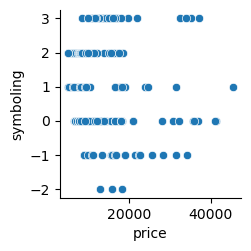

In [10]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)
plt.show()

In [11]:
cars_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

#### From the above data we can infer that the car name comprises of two parts i.e; the car company and the car model. 

In [12]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [13]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
cars_data = cars_data.drop(['CarName'], axis =1)

In [15]:
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

#### From the above data we can see that some of car_company names has been misspelled. Hence we need to fix it.

In [16]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [17]:
cars_data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [18]:
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [19]:
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [20]:
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

#### Converting the doornumber variable into numeric variable

In [21]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [22]:
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [23]:
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [24]:
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [26]:
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

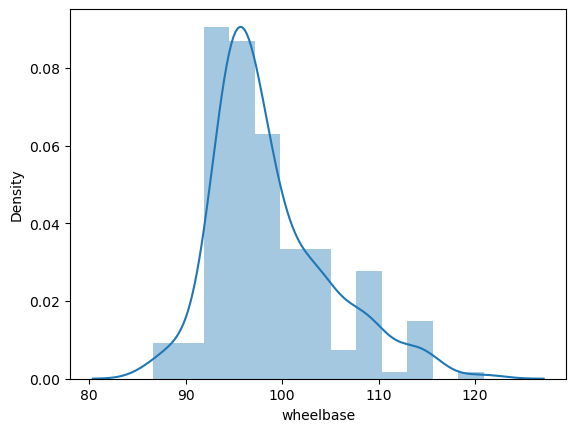

In [27]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [28]:
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

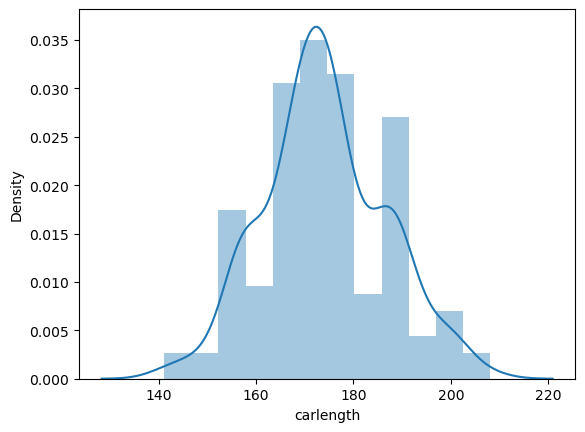

In [29]:
sns.distplot(cars_data['carlength'])
plt.show()

In [30]:
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [31]:
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

#### We need to convert this categorical variable into numerical variable. 

In [32]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [33]:
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [34]:
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

# Data Visualization

In [35]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 3000x3000 with 0 Axes>

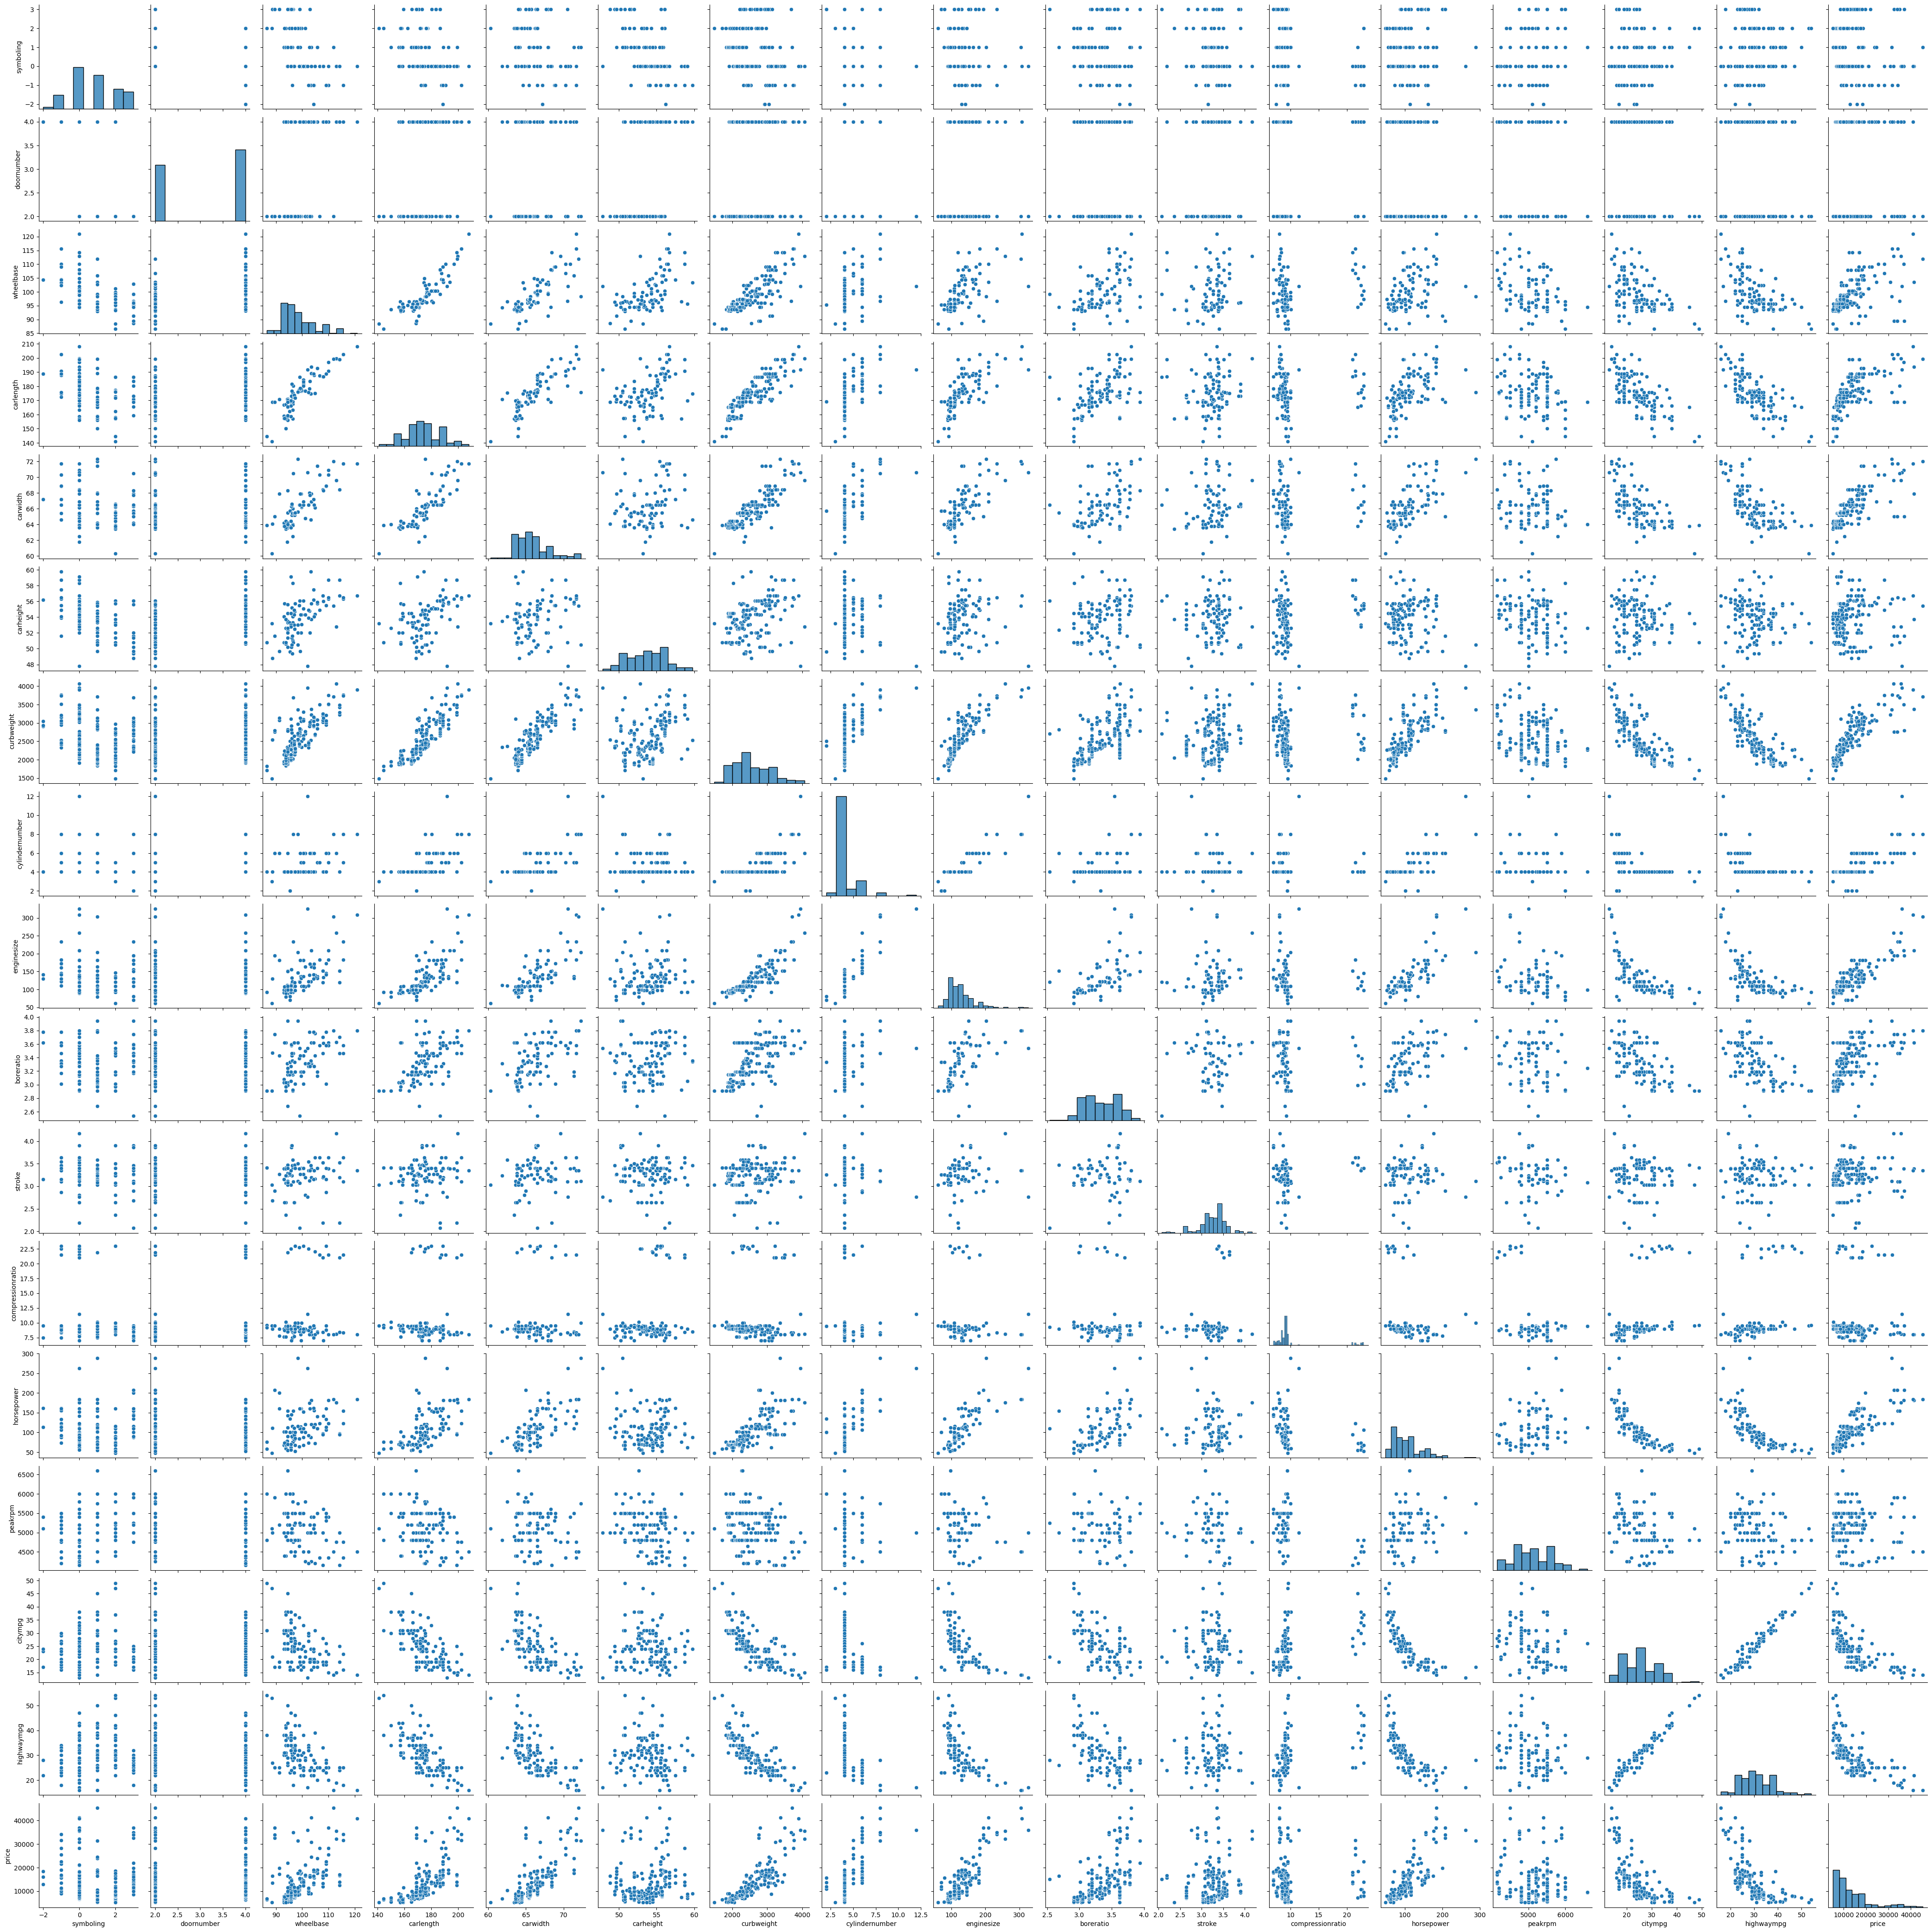

In [36]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

### Since there are a lot of columns in the dataset, we can't find out the correlation using the above plot between the variables. So for this we need to plot heatmap.

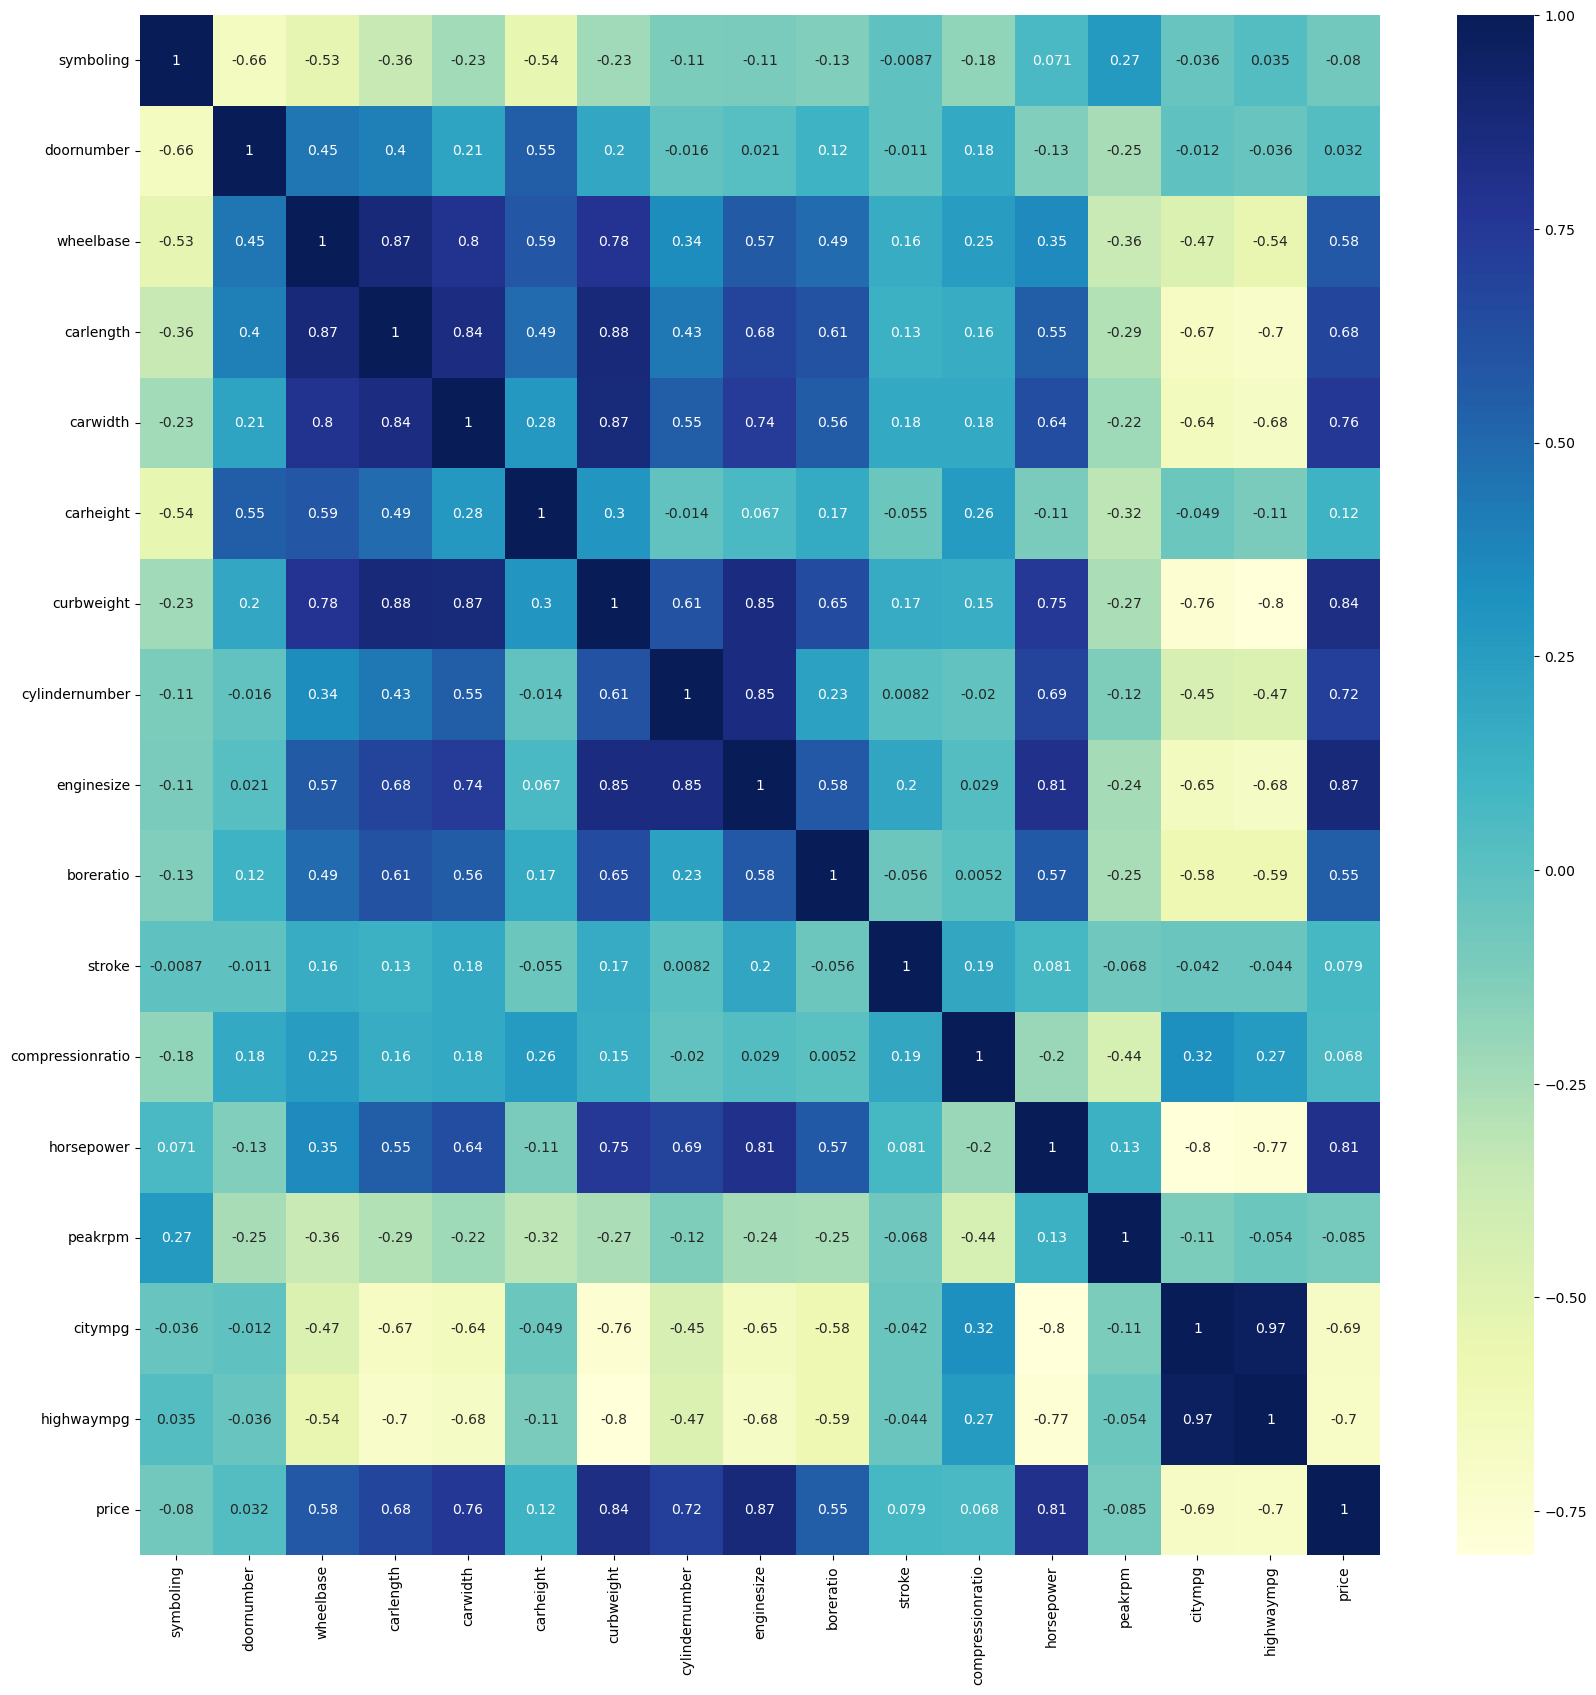

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

### From the above plot we can infer the following data;

#### Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

#### Price is negatively correlated to symboling, citympg and highwaympg.

#### Also the cars having high mileage may fall in the 'economy' cars category, and are priced lower.

#### There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [38]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


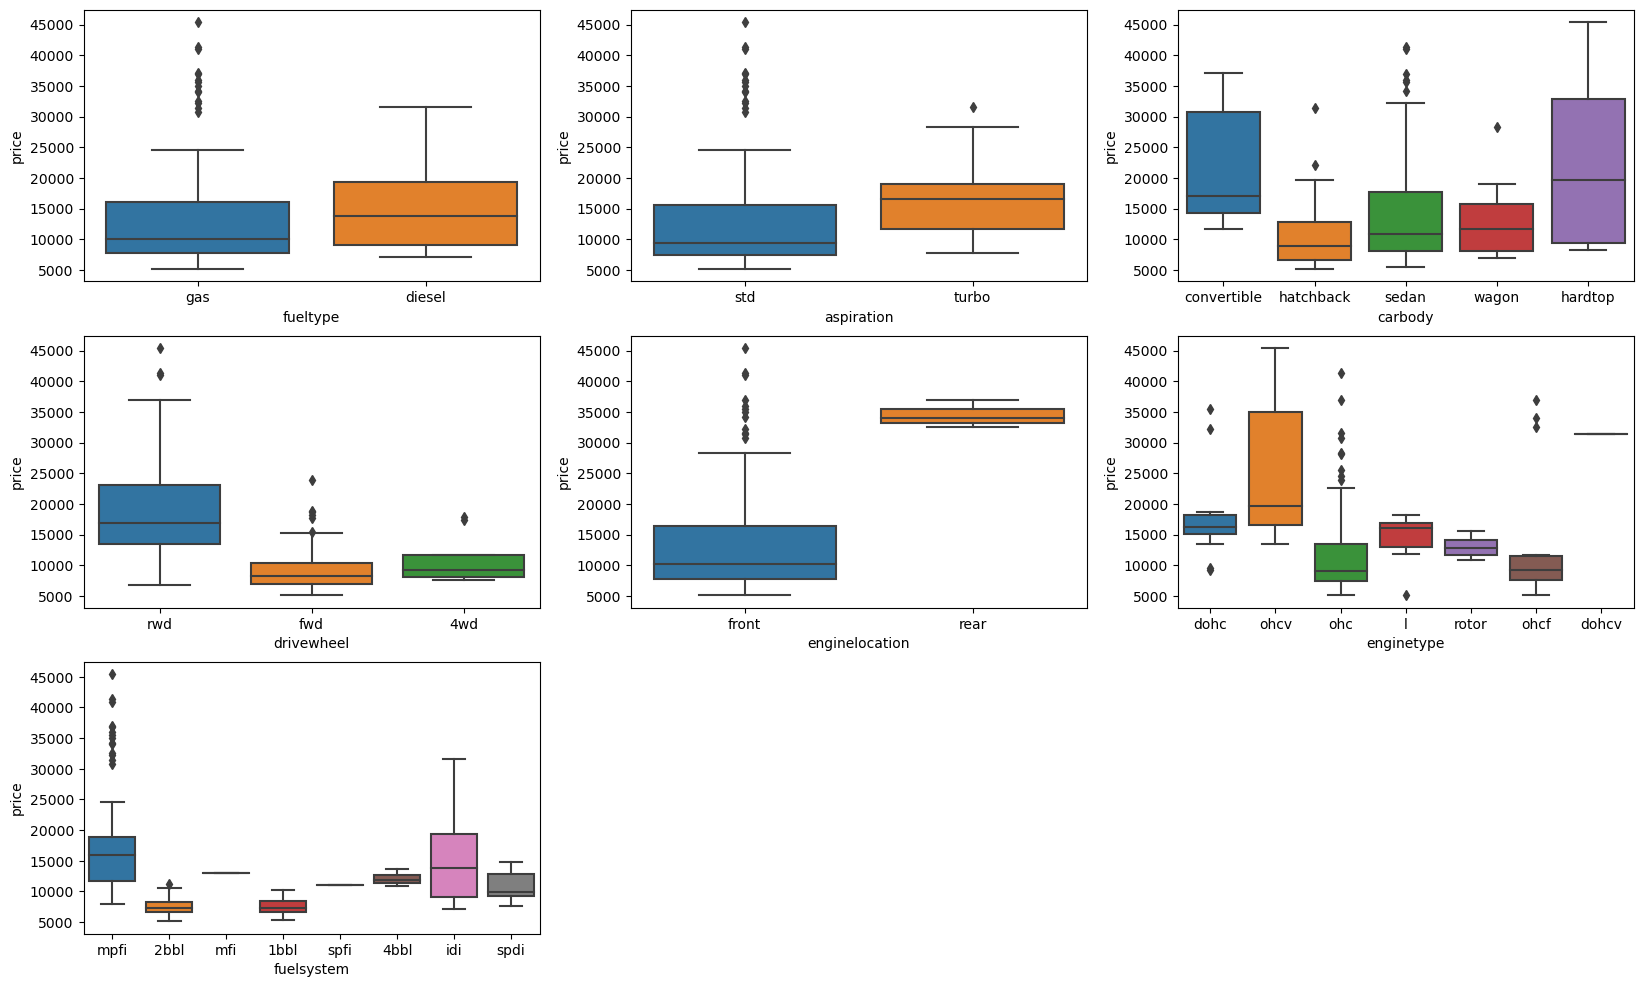

In [40]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)
plt.show()

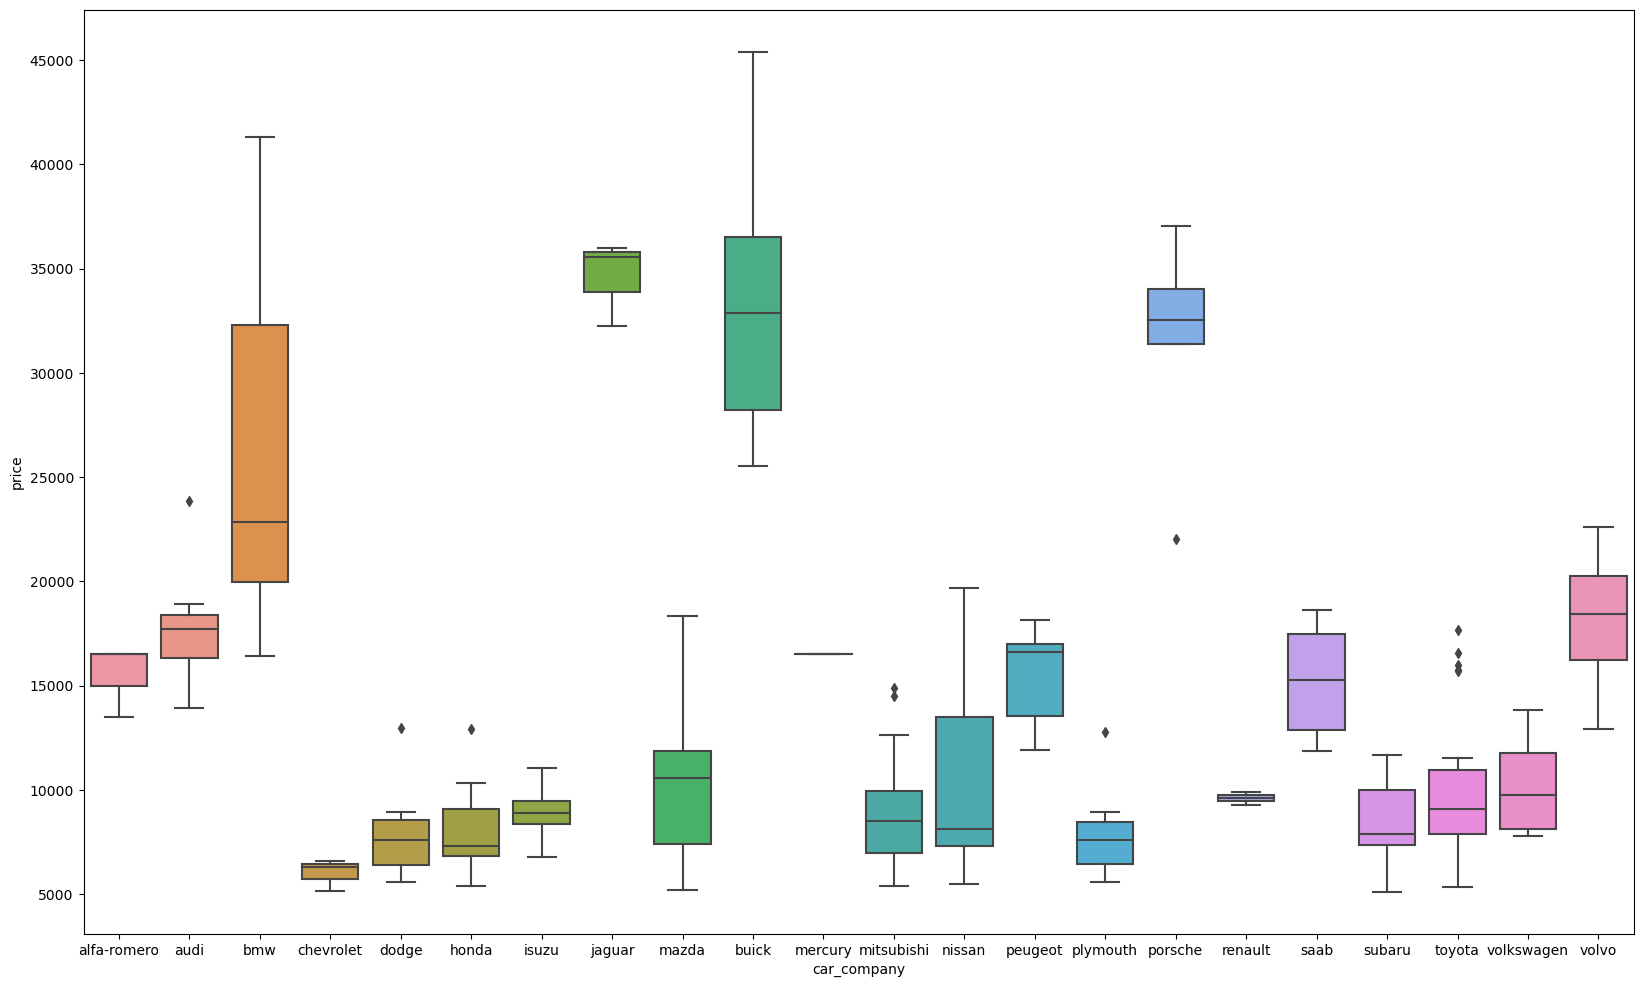

In [41]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)
plt.show()

1. From the price boxplot it is clear that the car companys with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
2. Whereas the lower priced cars belong to chevrolet
3. The median price of gas vehicles is lower than that of Diesel Vehicles.
4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles. 
6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.
11. Vehicles with OHCV engine type falls under higher price range.

# Data Preprocessing

In [42]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)

In [44]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [45]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

## Performing the train_test_split operation 

In [46]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.shape

(143, 60)

In [48]:
df_test.shape

(62, 60)

## Scaling the data using StandardScaler()

In [49]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [50]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [51]:
scaler = StandardScaler()

In [52]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [53]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [54]:
y_train = df_train.pop('price')
X_train = df_train

## Performing feature selection using Recursive Feature Elimination (RFE)

In [55]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select= 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('doornumber', False, 38),
 ('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 22),
 ('peakrpm', False, 23),
 ('citympg', False, 35),
 ('highwaympg', False, 29),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 39),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 21),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 42),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi'

In [57]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

## Model 1

In [58]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [59]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.59e-64
Time:                        13:50:54   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### All the p- values are significant. Let us check VIF.

In [60]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


#### VIF is Variance Inflation factor. quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity. We see that there are a few variables which have an infinite/large VIF. These variables aren't of use. But manual elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE.

### Now building the model with 10 variables.

In [61]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,n_features_to_select=10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [62]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('symboling', False, 46),
 ('doornumber', False, 43),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 21),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 17),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 44),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 24),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 47),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_id

In [63]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

## Model 2

In [64]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [65]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.98e-64
Time:                        13:51:29   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

#### Now let us check the VIF for this model.

In [66]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### As we see, still there are columns with high VIF. Let us drop column car_company_subaru.

## Model 3

In [67]:
X3 = X2.drop(['car_company_subaru'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [68]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.98e-64
Time:                        13:51:42   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [69]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### Droppping the column enginetype_ohcf.

## Model 4

In [70]:
X4 = X3.drop(['enginetype_ohcf'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [71]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           8.22e-65
Time:                        13:51:57   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [72]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


#### VIF for car_company_peugeot is still high. Let us drop this column and rebuild the model.

## Model 5

In [73]:
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [74]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.49e-63
Time:                        13:52:10   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [75]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


#### Let us drop the column enginetype_1

## Model 6

In [76]:
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

Model_6 = sm.OLS(y_train,X6_sm).fit()

In [77]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.92e-64
Time:                        13:52:32   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [78]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


#### All the VIF & p values seem to be in good range.

# Residual Analysis

In [79]:
y_train_pred = Model_6.predict(X6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [80]:
Residual = y_train- y_train_pred

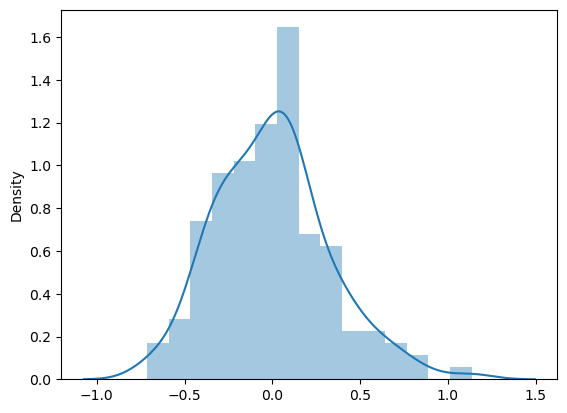

In [81]:
sns.distplot(Residual, bins =15)
plt.show()

### Now we need to make predictions on our model.

In [82]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [83]:
y_test = df_test.pop('price')
X_test = df_test

In [84]:
final_cols = X6.columns

In [85]:
X_test_model6= X_test[final_cols]
X_test_model6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [86]:
X_test_sm = sm.add_constant(X_test_model6)

In [87]:
y_pred = Model_6.predict(X_test_sm)

In [89]:
y_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

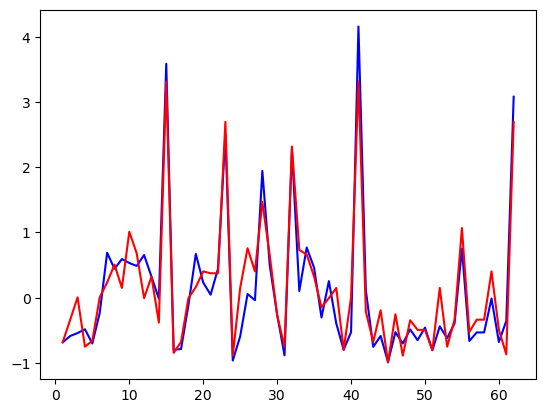

In [90]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.show()

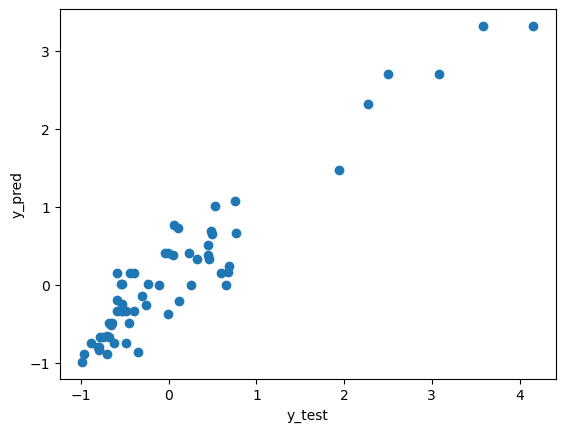

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### Though the model is performing better at the beginning, still there are few high values which the model is not able to explain.

# Model Evaluation

In [92]:
r_square = r2_score(y_test,y_pred)
r_square

0.8997211435182686

## The variables which are significant in predicting the price of a car are: 

### enginesize, carwidth, enginetype_rotor, car_company_bmw, enginelocation_rear, car_company_renault

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.3406289558669198
Model r2_score: 0.8997211435182686


R2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.340.

Another model was created separately with 5 predictor features with PWratio variable inplace to horsepower. The error distrubution was more close to a normal distribution and centered at zero as below,

### Suggestions:
    
The chinese company Geely Automotives entering the US market should consider the below listed points,

#### Average US car price: 13000 USD(approx). For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.

Also, keeping into account the predominating or the popular factors of a car in US market will give a better understanding of the needs and requirment of the citizens of USA.

-symboling: moderate (0,1)
    
-Carbody: Sedan
    
-fueltype: gas
    
-aspiration: standard
    
-doornumbers: four
    
-drivewheel: forward
    
-engine location: front
    
-engine type: ohc
    
-cylinderNumber: four
    
-fuelSystem: mpfi
    
This can be used to make the appropriate changes in design, features and the price offered to the customer.